In [1]:
import numpy as np
import mth433 as mth
import matplotlib.pyplot as plt

In [2]:
def get_h(x):
    """
    We are finding the length of the jth subinterval.
    Input: A vector x
    Output: A vector with distances between the elements of x from j+1 to j
    """
    n = len(x)
    h = []
    for j in range(n-1):
        h_2 = (x[j+1] - x[j])
        h.append(h_2)
    return h

In [3]:
def get_c(h,y):
    """
    We are finding a column vector made up of our desired coefficients by using Ac = z, where we use h to find A.
    Input(s): The length of the jth subinterval h and an input vector y
    Output: a column matrix c
    """
    n = len(h)
    c = []
    z = np.zeros(n-1)
    A = np.zeros((n-1,n-1))
    
    for j in range(n-1):
        A[j,j] = 2*(h[j] + h[j+1])
        
    for j in range(1,n-1):
        A[j,j-1] = h[j]
        A[j-1,j] = h[j]

    for j in range(n-1):
        z[j] = 3*(((y[j+2] - y[j+1])/h[j+1]) - ((y[j+1] - y[j])/h[j]))

    c = np.linalg.solve(A,z)
    c = np.insert(c,0,0)
    c = np.insert(c,n,0)
    return c

In [4]:
def get_b(c,h,y):
    """
    We are trying to find the coefficient for b, by utilizing c,h,j
    Inputs: We are inputting our y vector, our coefficents for c, and the length of the jth subinterval h
    Output: a column matrix b
    """
    n = len(y)
    b = []
    for j in range(n-1):
        b_2 = ((y[j+1] - y[j])/h[j]) - (((2*c[j] + c[j+1])*h[j])/3)
        b.append(b_2)
    return b

In [5]:
def get_d(c,h):
    """
    We are trying to find the coefficient for d, by utilizing c and h 
    Inputs: Our coefficents for c and the length of the jth subinterval h
    Output: a column matrix d
    """
    n = len(c)
    d = []
    for j in range(n-1):
        d_2 = (c[j+1] - c[j])/(3*h[j])
        d.append(d_2)
    return d

In [6]:
def cubic_co2D(pts):
    """
    Takes a nx2 numpy array [x,y] and makes cubic coefficients for the pairs:
    [0,1,...,n-1].T, x and [0,1,...,n-1].T,y (just as the text says on page 283)
    
    Inputs: numpy array of coordinates
    
    Returns: A 2xn-1x3 3D arrayLinks to an external site. A where A[0, :, :] are the b,c,d cubic coefficients 
    for the first pair and A[1, :, :] are the b,c,d cubic coefficients for the second pair. 
    To initialize a 3D array to zero it's just A = np.zeros((2,n-1,3)).  
    Indexing in a 3D array works as you think it would, but see the above link or ask me if it doesn't
    """
    n,_ = pts.shape
    x = pts[:,0]
    y = pts[:,1]
    
    ascending = np.arange(0,n)
    h = get_h(ascending)
    
    c_x = get_c(h,x)
    b_x = get_b(c_x,h,x)
    d_x = get_d(c_x,h)
    c_x = np.delete(c_x, -1)
    Q_x = np.array([b_x,c_x,d_x]).T
    
    c_y = get_c(h,y)
    b_y = get_b(c_y,h,y)
    d_y = get_d(c_y,h)
    c_y = np.delete(c_y, -1)
    Q_y = np.array([b_y,c_y,d_y]).T
    
    A = np.zeros((2,n-1,3))
    
    A[0,:,:] = Q_x
    A[1,:,:] = Q_y
    return A

In [7]:
pts = np.array([[0.30241935, 0.83116883],
                [0.13104839, 0.36038961],
                [0.55443548, 0.18993506],
                [0.40927419, 0.49837662],
                [0.46572581, 0.82034632]])
A = cubic_co2D(pts)
A

array([[[-0.37489198,  0.        ,  0.20352102],
        [ 0.23567108,  0.61056306, -0.42284706],
        [ 0.18825604, -0.6579781 ,  0.32456077],
        [-0.15401785,  0.31570421, -0.10523474]],

       [[-0.51725804,  0.        ,  0.04647882],
        [-0.37782159,  0.13943645,  0.06793059],
        [ 0.10484307,  0.34322821, -0.13962972],
        [ 0.37241033, -0.07566095,  0.02522032]]])

In [8]:
def cubic_plot2D(a,b,c,d,left,right):
    """
    Very slight modification of cubic_plot. 
    In this version a,b,c,d are each a 2x1 vector instead of scalars. Plot the curve:
    t -> (a[0] + b[0](t - left) + c[0](t - left)^2 + d[0](t - left)^3, a[1] + b[1](t - left) + c[1](t - left)^2 + d[1](t - left)^3)
    for left <= t <= right.
    """
    t = np.linspace(left, right, num=100)
    x = (a[0] + b[0]*(t - left) + c[0]*(t - left)**2 + d[0]*(t - left)**3)
    y = a[1] + b[1]*(t - left) + c[1]*(t - left)**2 + d[1]*(t - left)**3
    return plt.plot(x,y,'r')

In [9]:
def spline_plot2D(coef,x,y):
    """
    Very slight modification of spline_plot. 
    In this case A is a 3D array of size 2x(n-1)x3 (the output of cubic_co2D). Plot the spline.
    """
    _,n,_ = coef.shape
    A = coef
    k = A[0,:,:]
    l = A[1,:,:]
    
    for j in range(n):
        b_x,c_x,d_x = k[j]
        b_y,c_y,d_y = l[j]
        a = [x[j],y[j]]
        b = [b_x,b_y]
        c = [c_x,c_y]
        d = [d_x,d_y]
        plot = cubic_plot2D(a,b,c,d,j,j+1)
    return plot

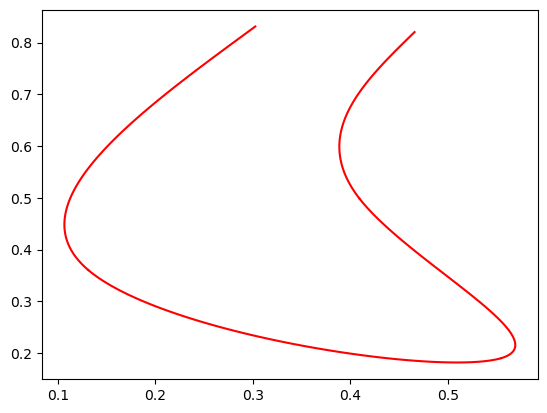

In [10]:
spline_plot2D(A,pts[:,0:1],pts[:,1:2])

In [11]:
pts = np.array([[0.30241935, 0.83116883],
                [0.13104839, 0.36038961],
                [0.55443548, 0.18993506],
                [0.40927419, 0.49837662],
                [0.46572581, 0.82034632]])
A = cubic_co2D(pts)

In [12]:
pts[:,0:1]

array([[0.30241935],
       [0.13104839],
       [0.55443548],
       [0.40927419],
       [0.46572581]])

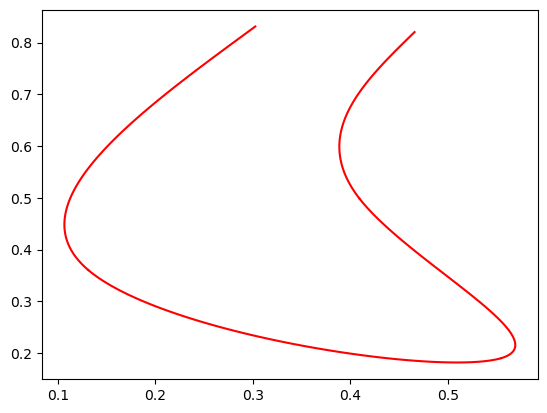

In [13]:
spline_plot2D(A,pts[:,0:1],pts[:,1:2])

In [14]:
def draw(n) :
    """
    Calls pts=recordpts(n) (see this assignment for a refresher on recordpts) 
    and plots the spline curve of the resulting points. Your spline should all be the same color! 
    Feel free to set a default color and make it optional for the user to choose a color 
    or to keep the original points or not.  Basically do whatever you want with it just make sure
    it does the bare minimum.
    """
    pts = mth.recordpts(n)
    cubic = cubic_co2D(pts)
    plot = spline_plot2D(cubic,pts[:,0:1],pts[:,1:2])
    return plot

In [15]:
%matplotlib qt

In [17]:
draw(5000)